In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import math

## Aufgabe 1: Logistische Regression mit sklearn

#### a) Daten vorbereiten

Lesen Sie den Diabetes-Datensatz ein. Spalten Sie die Zielvariable (Outcome) ab und splitten Sie die Daten anschließend in Trainings- und Testdaten, sodass die Testdaten 30% der ursprünglichen Samples enthalen.

In [42]:
data = pd.read_csv('../DecisionTree/diabetes.csv')

data_y = data.iloc[:,-1]
data_x = data.drop(data.columns[-1], axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, train_size = 0.7, test_size = 0.3)

#### b) Logistisches Regressionsmodell auf dem Datensatz trainieren

Trainieren Sie in Logistisches Regressionsmodell auf den Trainingsdaten.

In [43]:
model = LogisticRegression(random_state=0, max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=0)

#### c) Modellanwendung -und -bewertung

Wenden Sie das Modell auf den Trainingsdatensatz und auf den Testdatensatz an und berechnen Sie jeweils die Konfusionsmatrix, die Accuracy, die Precision und den Recall. 

In [44]:
trainings_labels = model.predict(X_train)
test_labels = model.predict(X_test)

trainings_matrix = confusion_matrix(y_train, trainings_labels)
test_matrix = confusion_matrix(y_train, trainings_labels)

print("Training acc: {}".format(model.score(X_train, y_train)))
print("Test acc: {}".format(model.score(X_test, y_test)))
print()
print(f'Training matrix: {trainings_matrix}')
print(f'Test matrix: {test_matrix}')
print()
print(f'Training precision: {precision_score(y_train, trainings_labels)}')
print(f'Test precision: {precision_score(y_test, test_labels)}')
print()
print(f'Training recall: {recall_score(y_train, trainings_labels)}')
print(f'Test recall: {recall_score(y_test, test_labels)}')

Training acc: 0.7560521415270018
Test acc: 0.8398268398268398

Training matrix: [[308  41]
 [ 90  98]]
Test matrix: [[308  41]
 [ 90  98]]

Training precision: 0.7050359712230215
Test precision: 0.8028169014084507

Training recall: 0.5212765957446809
Test recall: 0.7125


#### d) ROC-Kurve zeichnen

Berechnen Sie die ROC-AUC-Scores für den Trainings- und den Testdatensatz und zeichen Sie die ROC-Kurven für den Trainings- und den Testdatensatz in ein gemeinsames Diagramm.

ROC score training: 0.8177467536426264
ROC score test: 0.8852649006622517


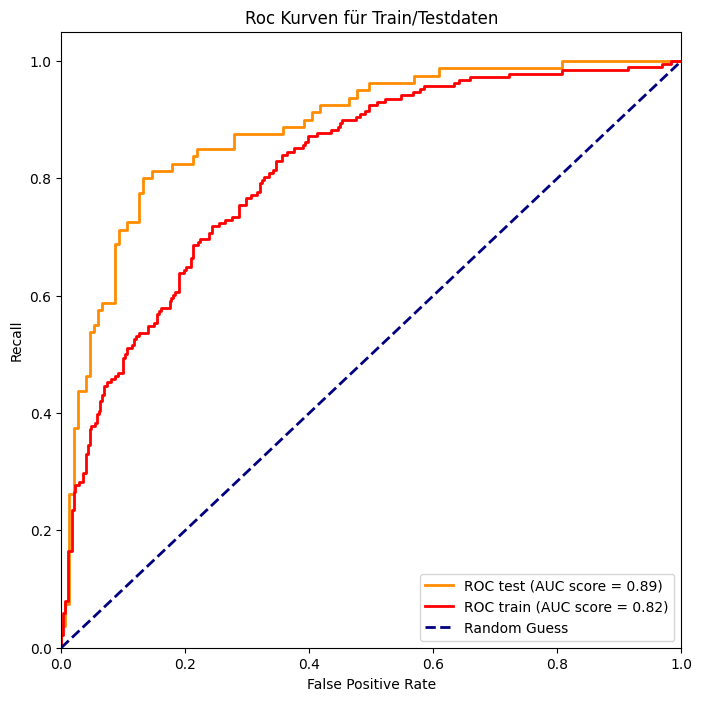

In [57]:
proba_train = model.predict_proba(X_train)[:,1]
proba_test = model.predict_proba(X_test)[:,1]

roc_train = roc_auc_score(y_train, proba_train)
roc_test = roc_auc_score(y_test, proba_test)

print("ROC score training: {}".format(roc_train))
print("ROC score test: {}".format(roc_test))

fpr_test, tpr_test, threshold_test = roc_curve(y_test, proba_test)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, proba_train)

plt.figure(figsize=(8, 8))

plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (AUC score = {roc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC train (AUC score = {roc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Roc Kurven für Train/Testdaten')
plt.legend(loc="lower right")

plt.show()

#### e) Precision-Recall-Kurve zeichnen

Zeichen Sie die Precision-Recall-Kurve für den Trainings- und den Testdatensatz in ein gemeinsames Diagramm.

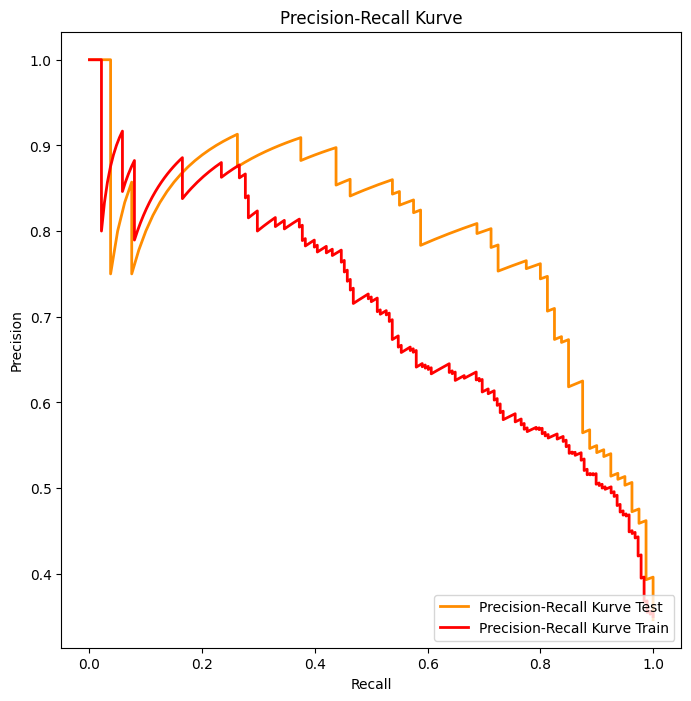

In [58]:

precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, proba_test)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, proba_train)

plt.figure(figsize=(8, 8))

plt.plot(recall_test, precision_test, color='darkorange', lw=2, label='Precision-Recall Kurve Test')
plt.plot(recall_train, precision_train, color='red', lw=2, label='Precision-Recall Kurve Train')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Kurve')
plt.legend(loc="lower right")

plt.show()

#### f) Beurteilen Sie anhand der bisherigen Ergebnisse die Güte des Modells.

TODO

## Aufgabe 2: Implementierung eines Logistischen Regressionsmodells

In dieser Aufgabe soll ein Logistisches Regressionsmodell selbst implementiert werden und anhand des Iris-Datensatzes getestet werden.

#### Iris-Datensatz lesen

In [47]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [48]:
X = X[0:100,0:2]
y = y[0:100].reshape(-1,1)

matrix = np.ones((len(X), 3))

feature_col_1 = np.array([X[:, 0]])
feature_col_2 = np.array([X[:, 1]])

matrix[:,1] = feature_col_1
matrix[:,2] = feature_col_2

#### a) Logistische Funktion

Implementieren Sie die logistische Funktion $g(x)=\frac{1}{1+e^{-x}}$

In [49]:
def g(x):
    return 1 / (1 + np.exp(-x))

#### b) Vektorisierte Modellfunktion

Implementieren Sie eine (vektorisierte) Funktion, die die Modellfunktion $f_{\vec{\theta}}(x)=g(\theta_0+\theta_1x_1+\ldots+\theta_px_p)=g(\vec{\theta}^T\vec{x})$ auf einem Datensatz bestehend aus $m$ Samples auswertet. Die Funktion soll den Vektor $\vec{\theta}=(\theta_0,\ldots,\theta_p)^T\in\mathbb{R}^{p+1}$ und die Daten-Matrix $M=\left(\begin{array}{ll}1&x^{(1)}_1&\ldots & x^{(1)}_p\\ 1 & x^{(2)}_1&\ldots & x^{(2)}_p\\ \vdots & \vdots &&\vdots \\ 1& x^{(m)}_1&\ldots & x^{(m)}_p\end{array}\right)$ als Argumente haben.

In [50]:
def f(M, theta):
    return g(M@theta.T)

#### c) Vektorisiertes Kostenfunktional

Implementieren Sie das Kostenfunktional $J(\vec{\theta})= -\frac{1}{m}\sum_{i=1}^m y^{(i)}\log\left(f_{\vec{\theta}}(\vec{x}^{(i)})\right)+(1-y^{(i)})\log\left(1-f_{\vec{\theta}}(\vec{x}^{(i)})\right)$

In [51]:
def J(M, y, theta):
    m = len(y)
    sum = 0
    
    for i in range(m):
        pos_term = y[i] * math.log(f(M, theta))
        neg_term = (y - y[i]) * math.log(1 - f(M, theta))
        sum += (pos_term + neg_term)
    
    return (-1 / m) * sum

#### d) Gradientenverfahren

Implementieren Sie das Gradientenverfahren für die Logistische Regression

In [52]:

def gradient_descent(M, y, theta, max_iter, tol):
    
    """
    Computes the weights of a logistic regression classifier using gradient descent
        
    Parameters:
        M (array of shape m x p+1): extended matrix of training examples (see above)
        y (array of shape m x 1): target values corresponding to X
        theta (array of shape p+1 x 1): initial values for the weights
        max_iter (int):  max number of iterations to be carried out
        tol: the iteration is stopped if norm(update)<tol
        
    Returns:
        theta (array of shape p+1 x 1): weights computed by gradient descent
    """
    m = len(M)

    for _ in range(max_iter):
        h = g(np.dot(M, theta))
        error = h - y
        gradient = np.dot(M.T, error) / m 

        theta -= gradient

        # Check convergence using the update threshold
        if np.linalg.norm(gradient) < tol:
            print("break it down")
            break

    return theta

initial_theta = np.zeros((matrix.shape[1], 1))
gradient_descent(matrix, y.reshape(-1, 1), initial_theta, 100, 1e-5)

    

array([[ -1.04677301],
       [  6.03394602],
       [-10.22336345]])

#### e) Implementierung des Klassifikators für Logistische Regression

Die folgende Klasse implementiert einen Klassifikator für Logistische Regression. Vervollständigen Sie die Methoden **predict_proba** und **predict**.

In [53]:
class MyLogisticRegressionClassifier:
    
    def __init__(self, max_iter=100):
        self.theta = None
        self.max_iter = max_iter
    
    def fit(self, X, y):
        """
        Fits a Logistic regression classifier by employing gradient descent. The the resulting weights 
        are stored in self.theta
        
        Parameters:
            X (array of shape m x p): matrix training examples
            y (array of shape m x 1): target values corresponding to X
        """

        m, p = X.shape
        M = np.ones((m,p+1))
        M[:,1:] = X
        theta = np.zeros((p+1,1))
            
        self.theta = gradient_descent(M, y, theta, self.max_iter, 1e-5)
        
    def predict_proba(self, X):
        """
        Predicts the class probabilities for the positive class for samples (rows) in X
        
        Parameters:
            X (array of shape m x p): matrix containing the samples
        
        Returns:
            y (array of shape m x 1): array containing the predicted class probabilities
        
        """
        m, p = X.shape
        M = np.ones((m,p+1))
        M[:,1:] = X
        y = []

        prob = f(M, self.theta.T)
        return prob.reshape(-1, 1)
    
    def predict(self, X):
        """
        Predicts the class lables for all samples (rows) in X
        
        Parameters:
            X (array of shape m x p): matrix containing the samples
        
        Returns:
            y (array of shape m x 1): array containing predicted class labels
        
        """
        y = []
        probas = self.predict_proba(X)

        preds = (0.5 <= probas).astype(int)
            
        return preds

#### f) Anwendung des Klassifikators

Wenden Sie den Klassifikator auf den Iris-Datensatz an. Berechnen Sie die erzielte Accuracy auf dem gesamten Datensatz.

In [54]:
classificator = MyLogisticRegressionClassifier()
classificator.fit(X, y)

probs = classificator.predict_proba(X)
preds = classificator.predict(X)

#### g) Decision Boundary

Zeichnen Sie in das folgende Diagramm den decision boundary ein.

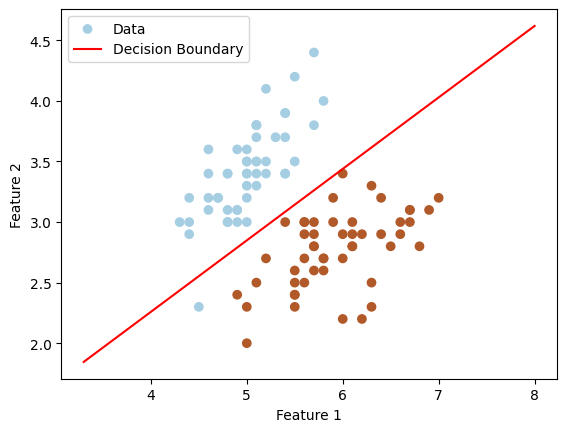

In [55]:
def plot_decision_boundary(theta, X, y):
    # Plot the data points
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, marker='o', label='Data')

    # Plot the decision boundary
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_boundary = - (theta[0] + theta[1] * x1_min) / theta[2], - (theta[0] + theta[1] * x1_max) / theta[2]

    plt.plot([x1_min, x1_max], x2_boundary, '-r', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.legend()
    plt.show()

plot_decision_boundary(classificator.theta, matrix, y)